In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Continious Variables

In [4]:
data = pd.read_csv('desktop/feature-engineering-for-machine-learning-main/feature-engineering-for-machine-learning-main/loan.csv')

In [5]:
data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


In [6]:
data['disbursed_amount'].unique()

array([23201.5 ,  7425.  , 11150.  , ...,  6279.  , 12894.75, 25584.  ])

Text(0, 0.5, 'Number of loans')

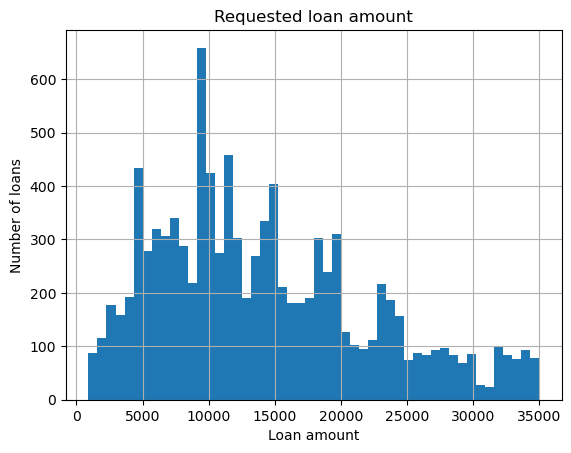

In [7]:
fig = data['disbursed_amount'].hist(bins=50)

fig.set_title('Requested loan amount')
fig.set_xlabel('Loan amount')
fig.set_ylabel('Number of loans')

In [8]:
data['interest'].unique()

array([15.484 , 11.2032,  8.51  , ..., 12.9195, 11.2332, 11.0019])

Text(0, 0.5, 'Number of Loans')

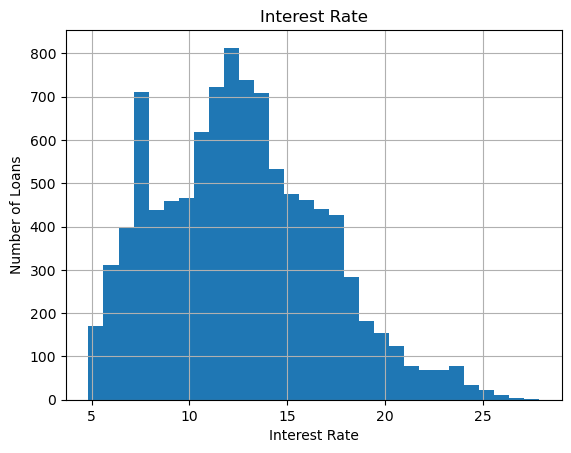

In [9]:
fig = data['interest'].hist(bins=30)

fig.set_title('Interest Rate')
fig.set_xlabel('Interest Rate')
fig.set_ylabel('Number of Loans')

In [10]:
# Discrete Var

In [11]:
data['number_open_accounts'].dropna().unique()

array([ 4., 13.,  8., 20., 14.,  5.,  9., 18., 16., 17., 12., 15.,  6.,
       10., 11.,  7., 21., 19., 26.,  2., 22., 27., 23., 25., 24., 28.,
        3., 30., 41., 32., 33., 31., 29., 37., 49., 34., 35., 38.,  1.,
       36., 42., 47., 40., 44., 43.])

In [ ]:
# .dropna(): This function is used to remove rows with missing (NaN) values 

Text(0, 0.5, 'Number of Customers')

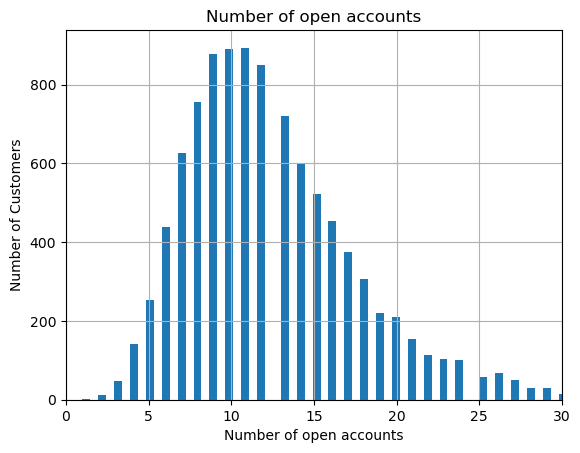

In [13]:
fig = data['number_open_accounts'].hist(bins=100)

# For better visualisation, I display a specific
# value range in the x-axis.
fig.set_xlim(0, 30)

# Title and axis labels.
fig.set_title('Number of open accounts')
fig.set_xlabel('Number of open accounts')
fig.set_ylabel('Number of Customers')

In [ ]:
#

In [14]:
data['householder'].unique()

array(['RENT', 'OWNER', 'MORTGAGE'], dtype=object)

Text(0, 0.5, 'Number of customers')

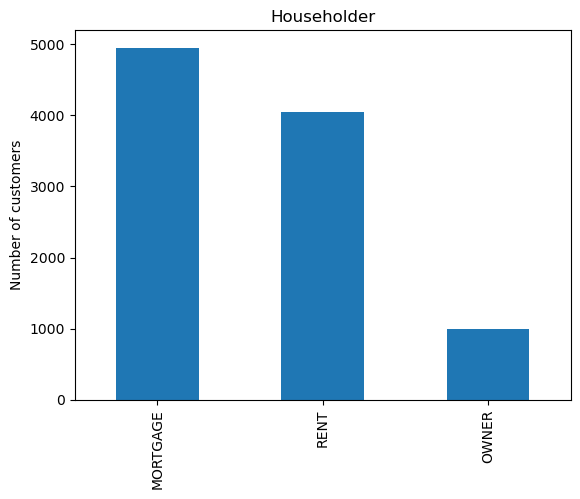

In [15]:
# Let's make a bar plot with the number of loans
# disbursed in each category of home ownership.

# The code below counts the number of observations (borrowers)
# in each category and then makes a bar plot.

fig = data['householder'].value_counts().plot.bar()
fig.set_title('Householder')
fig.set_ylabel('Number of customers')

In [16]:
data['householder'].value_counts()

MORTGAGE    4957
RENT        4055
OWNER        988
Name: householder, dtype: int64

In [17]:
# The "loan_purpose" variable is another categorical variable
# that indicates how the borrowers intend to use the
# money they are borrowing. For example, to improve their
# house, or to cancel previous debt.

data['loan_purpose'].unique()

array(['Debt consolidation', 'Car purchase', 'Other', 'Home improvements',
       'Moving home', 'Health', 'Holidays', 'Wedding'], dtype=object)

In [18]:
# Let's make a bar plot with the number of borrowers in each category.

In [20]:
data['loan_purpose'].value_counts()

Debt consolidation    8214
Other                  880
Home improvements      615
Car purchase            90
Health                  87
Holidays                48
Moving home             47
Wedding                 19
Name: loan_purpose, dtype: int64

Text(24.0, 0.5, 'Number of customers')

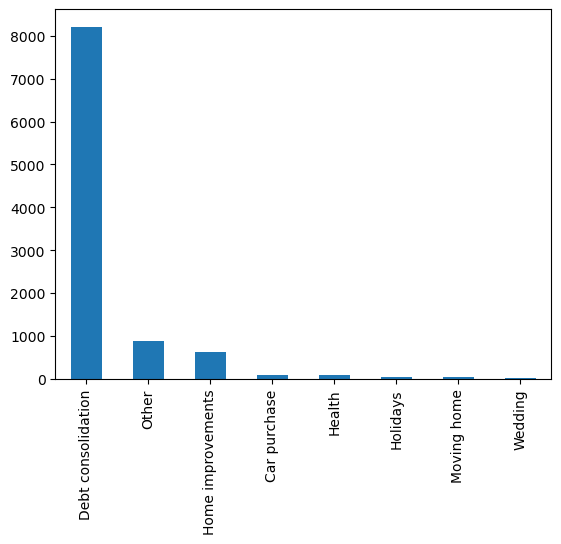

In [21]:
ig = data['loan_purpose'].value_counts().plot.bar()
fig.set_title('Loan Purpose')
fig.set_ylabel('Number of customers')

In [ ]:
# Date and Time

In [30]:
# Pandas assigns type 'object' to dates  when loading from csv.
# Let's have a look:

data[['date_issued', 'date_last_payment']].dtypes

date_issued          datetime64[ns]
date_last_payment            object
dtype: object

In [31]:
# Therefore, pandas will treat them as strings.
#To tell pandas that they are datetime variables, we need to re-cast them into datetime format.

In [32]:
data['date_issued_dt'] = pd.to_datetime(data['date_issued'])
data['date_last_payment_dt'] = pd.to_datetime(data['date_last_payment'])

data[['date_issued', 'date_issued_dt', 'date_last_payment', 'date_last_payment_dt']].head()

,date_issued,date_issued_dt,date_last_payment,date_last_payment_dt
0,2013-06-11,2013-06-11,2016-01-14,2016-01-14
1,2014-05-08,2014-05-08,2016-01-25,2016-01-25
2,2013-10-26,2013-10-26,2014-09-26,2014-09-26
3,2015-08-20,2015-08-20,2016-01-26,2016-01-26
4,2014-07-22,2014-07-22,2016-01-11,2016-01-11


In [33]:
# Let's extract the month and the year from the datetime variable to make plots.

data['month'] = data['date_issued_dt'].dt.month
data['year'] = data['date_issued_dt'].dt.year

In [35]:
# Let's see how much money has been disbursed  over the years to the different 
# markets (grade variable).

Text(0, 0.5, 'Disbursed Amount')

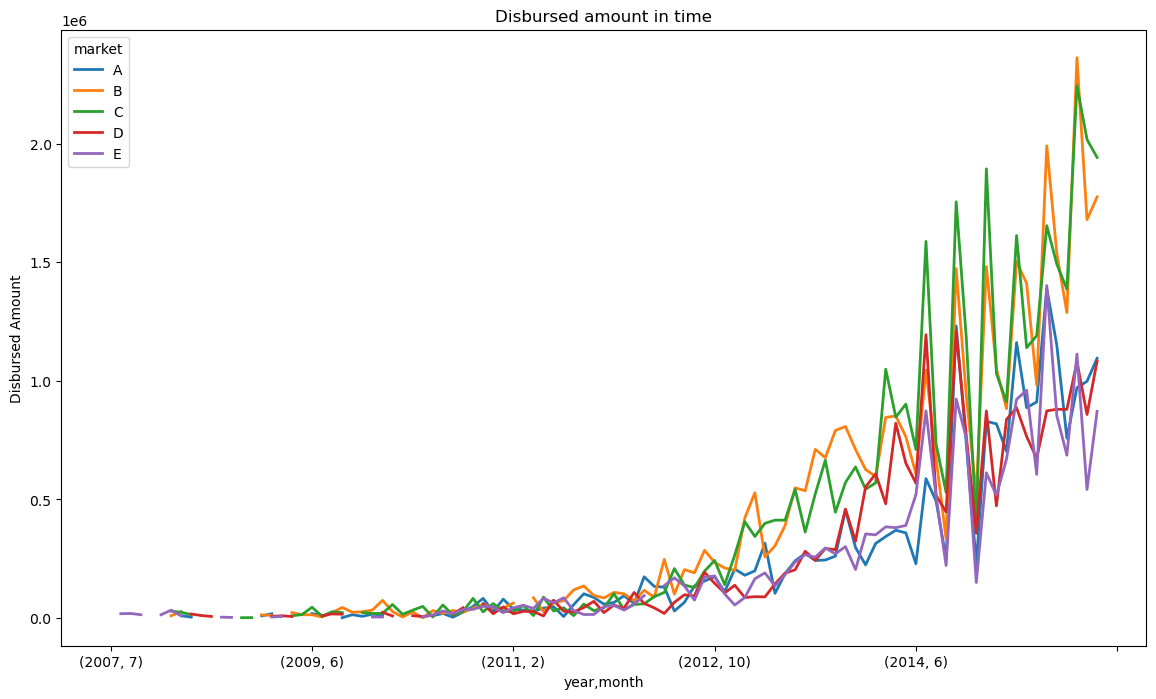

In [36]:
fig = data.groupby(['year', 'month', 'market'])['disbursed_amount'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed Amount')

In [37]:
# Mixed Variables

In [38]:
data = pd.read_csv('desktop/feature-engineering-for-machine-learning-main/feature-engineering-for-machine-learning-main/sample_s2.csv')

data.head()

,id,open_il_24m
0,1077501,C
1,1077430,A
2,1077175,A
3,1076863,A
4,1075358,A


In [39]:
data.shape

(887379, 2)

In [40]:
# 'A': couldn't identify the person
# 'B': no relevant data
# 'C': person seems not to have any account open

In [41]:
data.open_il_24m.unique()

array(['C', 'A', 'B', '0.0', '1.0', '2.0', '4.0', '3.0', '6.0', '5.0',
       '9.0', '7.0', '8.0', '13.0', '10.0', '19.0', '11.0', '12.0',
       '14.0', '15.0'], dtype=object)

In [42]:
# Now, let's make a bar plot showing the number of 
# borrowers for each of the values of the mixed variable.

Text(0, 0.5, 'Number of borrowers')

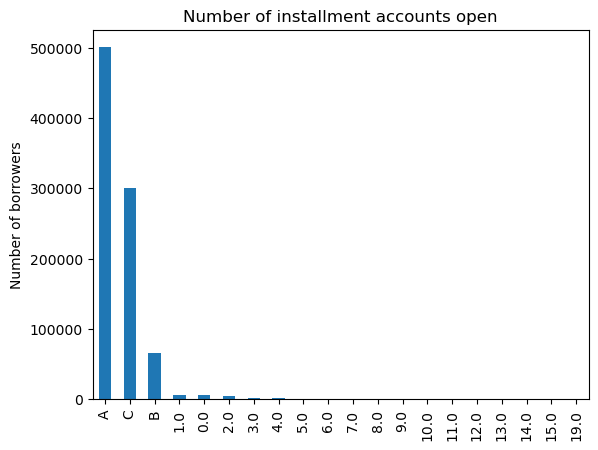

In [43]:
fig = data.open_il_24m.value_counts().plot.bar()
fig.set_title('Number of installment accounts open')
fig.set_ylabel('Number of borrowers')